In [61]:
# Assignment 2

Matrikelnr.: 2089929

## Imports

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import warnings
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import  Pipeline
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.ensemble import BaggingRegressor

warnings.filterwarnings("ignore")

## Überblick und Vorbereitung der Daten

### Import

In [63]:
df_car_price = pd.read_csv('02_Regression_CarPrice.csv')

In [64]:
df_car_price.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


### Encoding

In [65]:
df_car_price.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

Wir sehen einige Spalten vom Typ object, welche wir im nachfolgenden encoden.

In [66]:
# Mapping erstellen für alle nicht-numerischen Werte in den Daten
car_name_mapping = {value: idx for idx, value in enumerate(df_car_price['CarName'].unique())}
fueltype_mapping = {value: idx for idx, value in enumerate(df_car_price['fueltype'].unique())}
aspiration_mapping = {value: idx for idx, value in enumerate(df_car_price['aspiration'].unique())}
doornumber_mapping = {value: idx for idx, value in enumerate(df_car_price['doornumber'].unique())}
carbody_mapping = {value: idx for idx, value in enumerate(df_car_price['carbody'].unique())}
drivewheel_mapping = {value: idx for idx, value in enumerate(df_car_price['drivewheel'].unique())}
enginelocation_mapping = {value: idx for idx, value in enumerate(df_car_price['enginelocation'].unique())}
enginetype_mapping = {value: idx for idx, value in enumerate(df_car_price['enginetype'].unique())}
cylindernumber_mapping = {value: idx for idx, value in enumerate(df_car_price['cylindernumber'].unique())}
fuelsystem_mapping = {value: idx for idx, value in enumerate(df_car_price['fuelsystem'].unique())}

# Spalten encoden
df_car_price['CarName'] = df_car_price['CarName'].replace(car_name_mapping)
df_car_price['fueltype'] = df_car_price['fueltype'].replace(fueltype_mapping)
df_car_price['aspiration'] = df_car_price['aspiration'].replace(aspiration_mapping)
df_car_price['doornumber'] = df_car_price['doornumber'].replace(doornumber_mapping)
df_car_price['carbody'] = df_car_price['carbody'].replace(carbody_mapping)
df_car_price['drivewheel'] = df_car_price['drivewheel'].replace(drivewheel_mapping)
df_car_price['enginelocation'] = df_car_price['enginelocation'].replace(enginelocation_mapping)
df_car_price['enginetype'] = df_car_price['enginetype'].replace(enginetype_mapping)
df_car_price['cylindernumber'] = df_car_price['cylindernumber'].replace(cylindernumber_mapping)
df_car_price['fuelsystem'] = df_car_price['fuelsystem'].replace(fuelsystem_mapping)

In [67]:
df_car_price.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,0,0,0,0,0,0,0,88.6,...,130,0,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,1,0,0,0,0,0,0,88.6,...,130,0,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,2,0,0,0,1,0,0,94.5,...,152,0,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,3,0,0,1,2,1,0,99.8,...,109,0,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,4,0,0,1,2,2,0,99.4,...,136,0,3.19,3.40,8.0,115,5500,18,22,17450.0


In [68]:
df_car_price.describe()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.00000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,76.448780,0.097561,0.180488,0.560976,1.80000,0.673171,0.014634,98.756585,...,126.907317,1.478049,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,41.346261,0.297446,0.385535,0.497483,0.83666,0.556171,0.120377,6.021776,...,41.642693,2.184113,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,86.600000,...,61.000000,0.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,43.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,94.500000,...,97.000000,0.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,79.000000,0.000000,0.000000,1.000000,2.00000,1.000000,0.000000,97.000000,...,120.000000,1.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,113.000000,0.000000,0.000000,1.000000,2.00000,1.000000,0.000000,102.400000,...,141.000000,1.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,146.000000,1.000000,1.000000,1.000000,4.00000,2.000000,1.000000,120.900000,...,326.000000,7.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Ausreißer
Nun prüfen wir noch auf Ausreißer.

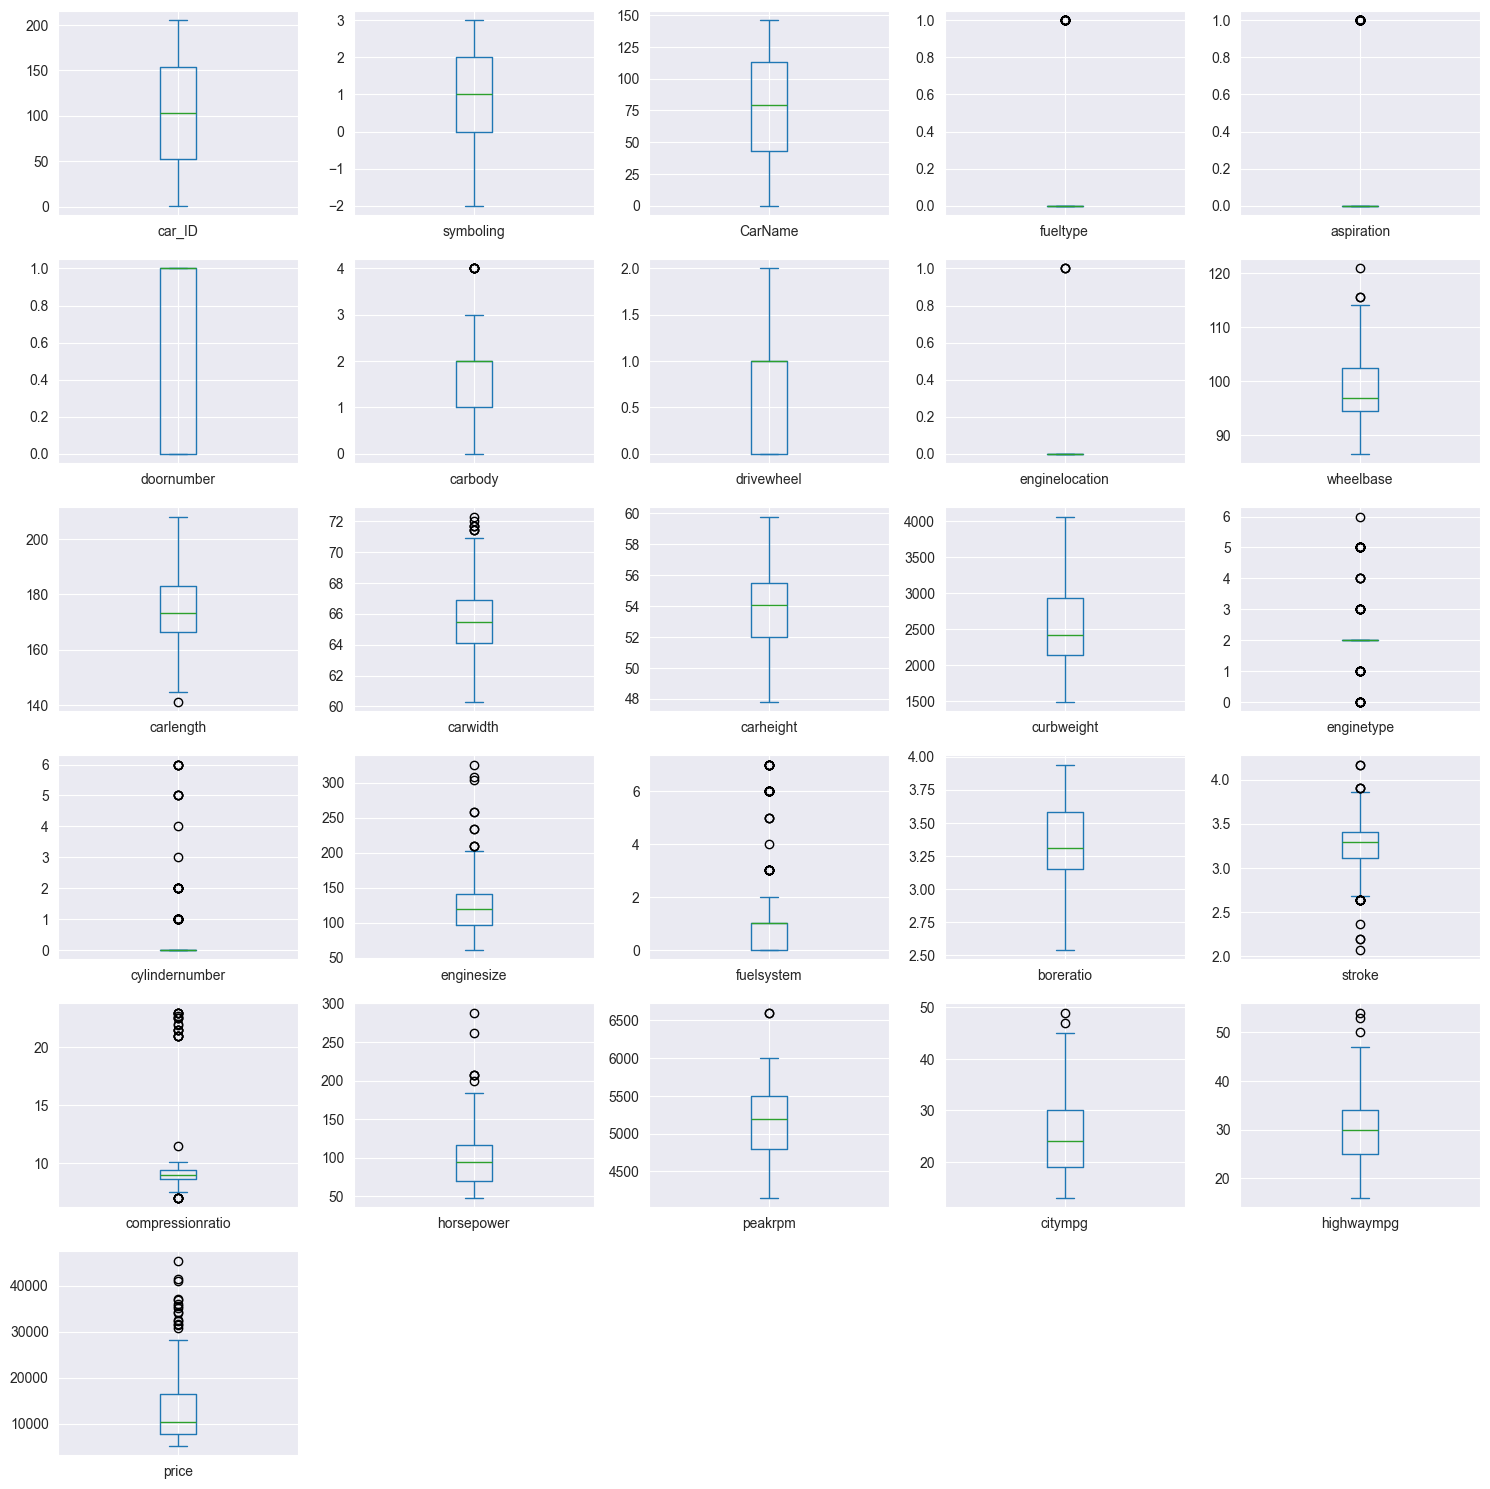

In [69]:
# Erstellen eines Boxplots
df_car_price.plot(kind='box', subplots=True, layout=(6,5), figsize=(15, 15))
plt.tight_layout()
plt.show()

Auf den ersten Blick sind keine Ausreißer zu erkennen. Lediglich bei der Preisspalte sind einige Punkte außerhalb des oberen Whiskers zu erkennen. Es handelt sich jedoch um plausible Autopreise, weshalb wir keine Ausreißer hier entfernen.

## Aufgabe 1
Train and evaluate a multiple regression model. Describe your approach and interpret the performance.

### Trainings- und Testdatensplit

In [70]:
# Entfernen der ID Spalte
del df_car_price['car_ID']

# Aufteilen in Features und Labels
y = df_car_price.price

# Entfernen der Preis Spalte
del df_car_price['price']

x = df_car_price

# Split in Test- und Trainingsdaten
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

### Trainieren des Modells
Als Modell habe ich die lineare Regression ausgewählt.

In [71]:
# Erstellen des linearen Regressionsmodell
lin_reg = LinearRegression()

# Trainieren des Models mit dem Trainingsdatensatz
lin_reg.fit(x_train, y_train)

# Predict auf Trainingsdaten
predictions_train = lin_reg.predict(x_train)

# Predict auf Testdaten
predictions_test = lin_reg.predict(x_test)

### Evaluierung

Für die Trainingsdaten:

In [72]:
# Evaluate mean absolute error
print('Mean Absolute Error(MAE):', mean_absolute_error(y_train,predictions_train)) # Evaluate mean squared error
print("Mean Squared Error(MSE):", mean_squared_error(y_train, predictions_train)) # Evaluate root mean squared error
print("Root Mean Squared Error(RMSE):", np.sqrt(mean_squared_error(y_train, predictions_train)))

# Evaluate R2-square
print("R2-Square:",r2_score(y_train, predictions_train))

Mean Absolute Error(MAE): 1628.9932728059766
Mean Squared Error(MSE): 4922162.9096490415
Root Mean Squared Error(RMSE): 2218.594805197434
R2-Square: 0.9192421029330657


Für die Testdaten:

In [97]:
# Evaluate mean absolute error
print('Mean Absolute Error(MAE):', mean_absolute_error(y_test,predictions_test)) # Evaluate mean squared error
print("Mean Squared Error(MSE):", mean_squared_error(y_test, predictions_test)) # Evaluate root mean squared error
print("Root Mean Squared Error(RMSE):", np.sqrt(mean_squared_error(y_test, predictions_test)))

# Evaluate R2-square
print("R2-Square:",r2_score(y_test, predictions_test))

Mean Absolute Error(MAE): 1964.7582316007765
Mean Squared Error(MSE): 9682766.60196035
Root Mean Squared Error(RMSE): 3111.714415231634
R2-Square: 0.8602460353107029


Das lineare Regressionsmodell schlägt sich ziemlich gut, mit einem R² von knapp 0,92 erklärt es einen großen Teil der Streuung in unseren Daten. Die Abweichungen zwischen den geschätzten und den tatsächlichen Werten, also der MAE von rund 1629 und der RMSE von etwa 2219, sind zwar nicht zu vernachlässigen, aber sie scheinen in einem vertretbaren Rahmen zu sein.

In [73]:
lin_reg.intercept_, lin_reg.coef_

(-56021.48794133326,
 array([ 2.99097556e+02, -1.85772255e+01, -5.85214436e+03,  2.96609184e+03,
         1.14531352e+03, -6.09257722e+02, -1.07363552e+03,  1.55047646e+04,
         1.27098062e+02, -3.90740069e+01,  4.85682308e+02,  1.76397033e+02,
         2.48100313e+00, -3.45151302e+02,  1.32039795e+03,  8.93121543e+01,
        -2.83616078e+02,  8.01800441e+02, -1.81502025e+03,  4.89029737e+02,
        -1.27317463e+01,  1.30059581e+00, -1.60693760e+02,  1.29359953e+02]))

Der Achsenabschnitt (Intercept) beträgt -56021.49. Auf den ersten Blick könnte es irritieren, dass hier ein negativer Wert zustande kommt, wenn man alle unabhängigen Variablen auf Null setzt. Es ist jedoch wahrscheinlich, dass der hohe negative Achsenabschnitt durch hohe positive Koeffizienten für einige der Variablen ausgeglichen wird, die in der Praxis niemals null sind, wie z.B. die Größe des Motors oder andere Basismerkmale eines Autos, die immer einen bestimmten positiven Wert haben.

Die Koeffizienten (Coefficients) im Array repräsentieren den Einfluss jeder unabhängigen Variablen auf den Preis des Autos. Positive Koeffizienten bedeuten, dass ein Anstieg der jeweiligen Variable zu einem Anstieg des Preises führt, während negative Koeffizienten anzeigen, dass ein Anstieg zu einem Preisrückgang führt.

Zum Beispiel:
- Der Koeffizient von etwa 299 bedeutet, dass für jede Einheitserhöhung dieser Variable der Preis des Autos um etwa 299 Einheiten steigt, wenn alle anderen Variablen gleich bleiben.
- Ein Koeffizient von etwa -5852 für eine andere Variable deutet darauf hin, dass ein Anstieg dieser Variable den Preis um etwa 5852 Einheiten senken würde.
Der relativ große positive Koeffizient von 15504.76 könnte ein Merkmal wie die Motorleistung oder eine Premium-Ausstattung repräsentieren, die den Preis eines Autos erheblich erhöht.

Nun erstellen wir noch einen Scatterplot, der die Beziehung zwischen den wahren Werten (auf der x-Achse) und den Vorhersagen des Modells (auf der y-Achse) darstellt.

Text(0.5, 0, 'True Values')

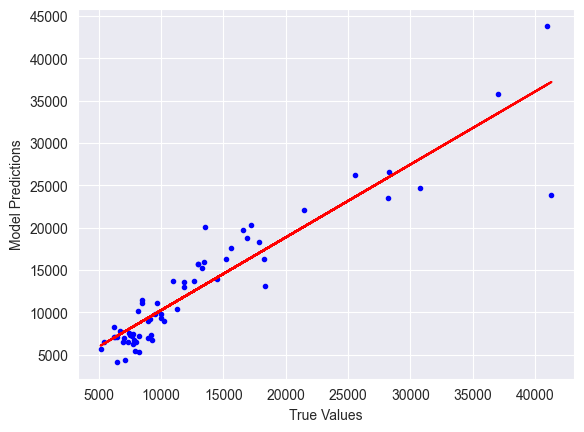

In [74]:
plt.plot(y_test, predictions_test, '.', color='blue')
z = np.polyfit(y_test, predictions_test, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), 'r')

plt.ylabel('Model Predictions')
plt.xlabel('True Values')

Die Modellvorhersagen scheinen insgesamt mit den wahren Werten übereinzustimmen, besonders bei niedrigeren Werten. Das bedeutet, dass das Modell tendenziell genauere Vorhersagen für Autos im niedrigeren bis mittleren Preissegment macht. Bei höheren wahren Werten scheinen die Punkte etwas mehr gestreut zu sein und weichen von der roten Linie ab. Dies deutet darauf hin, dass das Modell bei teureren Autos weniger genau sein könnte. Im hochpreisigen Segment lassen sich außerdem ein paar Ausreißer erkennen.

## Aufgabe 2
Train and evaluate at least two polynomial regression models with different polynomial degrees. Describe your approach and interpret the performance.

### Erstes Modell
Zuerst werden polynomiale Features zweiten Grades für die Datensätze erzeugt. Die `PolynomialFeatures` Funktion erweitert die vorhandenen Feature-Sets, indem sie nicht nur die ursprünglichen Features beibehält, sondern auch deren quadrierte Werte sowie alle möglichen paarweisen Interaktionen zwischen ihnen hinzufügt.

In [75]:
poly_features = PolynomialFeatures(degree=2, include_bias=False) 
x_poly = poly_features.fit_transform(x)

x_train_poly = poly_features.fit_transform(x_train)
x_test_poly = poly_features.fit_transform(x_test)

# Train-Test Split
x_train_poly, x_test_poly, y_train_poly, y_test_poly = train_test_split(x_poly, y, test_size=0.3, random_state=42)

Anschließend wird das Regressionsmodell trainiert und die Vorhersagen erstellt.

In [76]:
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(x_train_poly, y_train_poly)

y_pred_train_poly = lin_reg_poly.predict(x_train_poly)
y_pred_test_poly = lin_reg_poly.predict(x_test_poly)

### Evaluierung des ersten Modells
Für die Testdaten:

In [88]:
print('Mean Absolute Error(MAE):', mean_absolute_error(y_train_poly,y_pred_train_poly))
print("Mean Squared Error(MSE):", mean_squared_error(y_train_poly, y_pred_train_poly)) 
print("Root Mean Squared Error(RMSE):", np.sqrt(mean_squared_error(y_train_poly, y_pred_train_poly)))
print("R2-Square:",r2_score(y_train_poly, y_pred_train_poly))

Mean Absolute Error(MAE): 1.0989280743198794e-06
Mean Squared Error(MSE): 2.4201632770001816e-12
Root Mean Squared Error(RMSE): 1.5556873969407163e-06
R2-Square: 1.0


Für die Trainingsdaten:

In [89]:
print('Mean Absolute Error(MAE):', mean_absolute_error(y_test_poly,y_pred_test_poly)) 
print("Mean Squared Error(MSE):", mean_squared_error(y_test_poly, y_pred_test_poly))
print("Root Mean Squared Error(RMSE):", np.sqrt(mean_squared_error(y_test_poly, y_pred_test_poly)))
print("R2-Square:",r2_score(y_test_poly, y_pred_test_poly))

Mean Absolute Error(MAE): 50009.87974981838
Mean Squared Error(MSE): 6870157227.092034
Root Mean Squared Error(RMSE): 82886.41159497759
R2-Square: -98.15881999371474


Die Ergebnisse der polynomialen Regression auf den Testdaten zeigen außergewöhnlich geringe Fehlerwerte und ein perfektes Bestimmtheitsmaß (R²) von 1,0, was auf Overfitting hindeutet; das Modell passt sich den Testdaten zu genau an, was unrealistisch ist. Im Vergleich dazu waren die Fehlerwerte der linearen Regression höher und das R² deutlich niedriger, was auf ein weniger komplexes Modell hinweist, das die Daten möglicherweise besser generalisiert.

Text(0.5, 0, 'True Values')

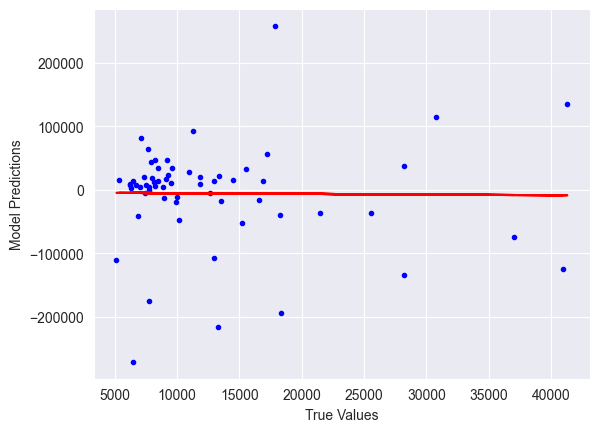

In [79]:
plt.plot(y_test, y_pred_test_poly, '.', color='blue')
z = np.polyfit(y_test, y_pred_test_poly, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), 'r')

plt.ylabel('Model Predictions')
plt.xlabel('True Values')

Die Vorhersagen des Modells sind weit gestreut und weichen erheblich von den wahren Werten ab. Dies zeigt sich darin, dass viele Vorhersagen sowohl weit über als auch unter den tatsächlichen Preisen liegen, einige sogar im negativen Bereich. Die Tatsache, dass viele Vorhersagen negativ sind, ist besonders problematisch, da negative Werte für die Zielvariable (Autopreise) keinen Sinn ergeben. Die rote Linie, die die perfekte Übereinstimmung darstellt, wird von den Datenpunkten nicht annähernd erreicht, was die extrem niedrige Modellleistung bestätigt.

### Zweites Modell
Als zweites Modell werde ich nun auf denselben Daten ein ElasticNet-Regressionstraining mit einem polynomialen Feature-Set vom Grad 3 durchführen. 

In [83]:
poly_features_2 = PolynomialFeatures(degree=3, include_bias=False) 
x_poly_2 = poly_features_2.fit_transform(x) 

# Train-Test Split
x_train_poly_2, x_test_poly_2, y_train_poly_2, y_test_poly_2 = train_test_split(x_poly_2, y, test_size=0.3, random_state=42)

Anschließend wird das Regressionsmodell trainiert und die Vorhersagen erstellt.

In [86]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(x_train_poly_2, y_train_poly_2)

y_pred_train_poly_2 = elastic_net.predict(x_train_poly_2)
y_pred_test_poly_2 = elastic_net.predict(x_test_poly_2)

### Evaluierung
Für die Trainingsdaten:

In [93]:
print('Mean Absolute Error(MAE):', mean_absolute_error(y_train_poly_2,y_pred_train_poly_2))
print("Mean Squared Error(MSE):", mean_squared_error(y_train_poly_2, y_pred_train_poly_2)) 
print("Root Mean Squared Error(RMSE):", np.sqrt(mean_squared_error(y_train_poly_2, y_pred_train_poly_2)))
print("R2-Square:",r2_score(y_train_poly_2, y_pred_train_poly_2))

Mean Absolute Error(MAE): 205.90430637960836
Mean Squared Error(MSE): 192068.40752914827
Root Mean Squared Error(RMSE): 438.2560981083415
R2-Square: 0.9968487348001744


Für die Testdaten:

In [95]:
print('Mean Absolute Error(MAE):', mean_absolute_error(y_test_poly_2,y_pred_test_poly_2)) 
print("Mean Squared Error(MSE):", mean_squared_error(y_test_poly_2, y_pred_test_poly_2))
print("Root Mean Squared Error(RMSE):", np.sqrt(mean_squared_error(y_test_poly_2, y_pred_test_poly_2)))
print("R2-Square:",r2_score(y_test_poly_2, y_pred_test_poly_2))

Mean Absolute Error(MAE): 3151.1090392994406
Mean Squared Error(MSE): 30010405.852359556
Root Mean Squared Error(RMSE): 5478.175412704449
R2-Square: 0.5668517715842691


Die Metriken für die Trainingsdaten zeigen einen sehr niedrigen MAE und RMSE sowie ein nahezu perfektes R², was auf eine ausgezeichnete Anpassung des Modells an die Trainingsdaten hindeutet. Im Gegensatz dazu sind die Fehlerwerte für die Testdaten deutlich höher, und das R² ist mit etwa 0,567 relativ niedrig, was eine Überanpassung (Overfitting) des Modells nahelegt. Nichtsdestotrotz generalisiert des Modell deutlich besser als das vorherige, auch wenn die Performance beider Modelle zu wünschen übrig lässt.

Text(0.5, 0, 'True Values')

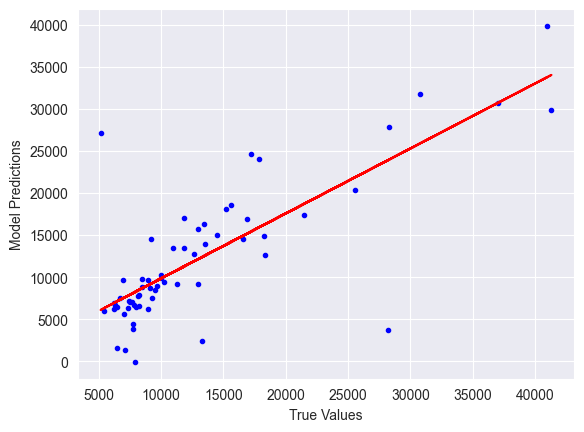

In [96]:
plt.plot(y_test_poly_2, y_pred_test_poly_2, '.', color='blue')
z = np.polyfit(y_test_poly_2, y_pred_test_poly_2, 1)
p = np.poly1d(z)
plt.plot(y_test_poly_2, p(y_test_poly_2), 'r')

plt.ylabel('Model Predictions')
plt.xlabel('True Values')

Der Scatterplot illustriert, dass das Modell für niedrigere Werte der Zielvariablen (Autopreise) tendenziell genauere Vorhersagen trifft, wie es der hohe R²-Wert für die Trainingsdaten suggeriert. Jedoch zeigt die Zunahme der Streuung um die ideale Vorhersagelinie bei höheren Werten, dass das Modell bei teureren Autos weniger präzise ist, was sich in einem niedrigeren R²-Wert für die Testdaten widerspiegelt.

## Aufgabe 3
Compare the results to the chosen machine learning models from task 1 and 2. Which machine learning model would you select?

Model 1 zeigt eine konsistente Performance mit einem R² von 0,919 auf den Trainingsdaten und 0,860 auf den Testdaten, was auf eine gute Generalisierungsfähigkeit hindeutet, obwohl die Fehlermaße auf den Testdaten höher sind als auf den Trainingsdaten. Model 2 weist auf den Trainingsdaten sehr hohe Fehler und ein negatives R² auf. Model 3 zeigt auf den Trainingsdaten nahezu perfekte Werte, leidet aber auf den Testdaten unter einer schlechten Generalisierung, was sich in einem niedrigen R² von 0,567 zeigt. Basierend auf diesen Ergebnissen wäre Model 1 die bevorzugte Wahl, da es die stabilste Leistung zwischen den Trainings- und Testdaten bietet. Für einen produktiven Einsatz ist allerdings die Prüfung anderer Modelle sowie ein weiteres tunen der Parameter ratsam.

## Aufgabe 4
Focus on the machine learning model that you have selected in task 3. Now optimizing your results by using regularization (lecture 3) and hyperparameter tuning (lecture 04).

### Regularization
Wir wenden eine Ridge Regularisierung an.

In [98]:
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(x_train_poly, y_train_poly)
y_pred_train_ridge = ridge_reg.predict(x_train_poly)
y_pred_test_ridge = ridge_reg.predict(x_test_poly)

### Hyperparameter-Tuning

Wir verwenden wieder die `GridSearchCV` Funktion, um das Hyperparameter Tuning durchzuführen.

In [101]:
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

ridge_cv = GridSearchCV(ridge_reg, param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1)
ridge_cv.fit(x_train_poly, y_train_poly)
print("Beste Parameter: ", ridge_cv.best_params_)

# Vorhersage mit dem besten gefundenen Modell
y_pred_train_hp = ridge_cv.predict(x_train_poly)
y_pred_test_hp = ridge_cv.predict(x_test_poly)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
Beste Parameter:  {'alpha': 100, 'solver': 'saga'}


### Evaluierung

In [102]:
print('Mean Absolute Error (MAE):', mean_absolute_error(y_train_poly,y_pred_train_ridge))
print("Mean Squared Error (MSE):", mean_squared_error(y_train_poly, y_pred_train_ridge)) 
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_train_poly, y_pred_train_ridge)))
print("R2-Square:",r2_score(y_train_poly, y_pred_train_ridge))

Mean Absolute Error(MAE): 2222.342764449102
Mean Squared Error(MSE): 9466272.194996724
Root Mean Squared Error(RMSE): 3076.7307641385723
R2-Square: 0.8446869293918522


### Cross-Validation
Nach der Ermittlung der optimalen Hyperparameter, setzen wir nun das Ridge-Modell mit diesen Parametern ein und führen eine Kreuzvalidierung durch, um die Modellleistung zu verifizieren.

In [108]:
# Ridge-Modell mit den besten Hyperparametern nutzen
best_alpha = ridge_cv.best_params_['alpha']
best_solver = ridge_cv.best_params_['solver']
ridge_best = Ridge(alpha=best_alpha,solver=best_solver)

# Cross Validation durchführen
scores = cross_val_score(ridge_best, x_train_poly, y_train_poly, scoring='neg_mean_squared_error', cv=5)

# Umwandlung der negativen MSE-Werte in positive Werte
mse_scores = -scores

# Berechnung der Durchschnittswerte, des Standards der MSE-Werte und von R²
print("Durchschnittlicher nach Cross Validation:", np.mean(mse_scores))
print("Standardabweichung des MSE nach Cross Validation:", np.std(mse_scores))
r2_scores = cross_val_score(ridge_best, x_train_poly, y_train_poly, scoring='r2', cv=5)
print("Durchschnittlicher R² nach Cross Validation:", np.mean(r2_scores))

Durchschnittlicher nach Cross Validation: 11959324.923997361
Standardabweichung des MSE nach Cross Validation: 3916700.5116866874
Durchschnittlicher R² nach Cross Validation: 0.7958365061265757


### Fazit
Die Ergebnisse der Kreuzvalidierung deuten auf eine deutliche Diskrepanz zwischen den Leistungsmetriken des Modells auf den Trainingsdaten und der Kreuzvalidierung hin. Während der R²-Wert von 0,8447 und die Fehlermaße (MAE, MSE, RMSE) nach dem Hyperparameter-Tuning auf den Trainingsdaten eine zufriedenstellende Modellleistung anzeigen, weisen die Ergebnisse der Kreuzvalidierung mit einem durchschnittlichen negativen R²-Wert von -0,6002 und sehr hohem durchschnittlichen MSE sowie großer Variabilität (Standardabweichung des MSE) auf eine erhebliche Inkonsistenz und potenzielles Overfitting hin.

## Aufgabe 5
Train and evaluate a regression tree. Optimize your results by using hyperparameter tuning
(lecture 04).

Wir nutzen die Funktion `DecisionTreeRegressor` auf unseren Testdaten.

In [110]:
tree_reg = DecisionTreeRegressor(random_state=42)

# Training des Modells auf den Trainingsdaten
tree_reg.fit(x_train, y_train)

# Predict auf den Trainings- und Testdaten
y_pred_train_tree = tree_reg.predict(x_train)
y_pred_test_tree = tree_reg.predict(x_test)

# Bewertung der Modellleistung
mse_train_tree = mean_squared_error(y_train, y_pred_train_tree)
mse_test_tree = mean_squared_error(y_test, y_pred_test_tree)
r2_train_tree = r2_score(y_train, y_pred_train_tree)
r2_test_tree = r2_score(y_test, y_pred_test_tree)

print(f"Trainings-MSE: {mse_train_tree}, Test-MSE: {mse_test_tree}")
print(f"Trainings-R²: {r2_train_tree}, Test-R²: {r2_test_tree}")

Trainings-MSE: 0.0, Test-MSE: 8945037.874256274
Trainings-R²: 1.0, Test-R²: 0.8708938716988032


Die perfekten Trainingswerte (MSE von 0.0 und R² von 1.0) des Regressionsbaums deuten auf eine Überanpassung hin. Im Gegensatz dazu zeigt der höhere Test-MSE und ein R² von 0.8709 auf den Testdaten eine geringere Leistung, was auf mangelnde Generalisierbarkeit hinweist. Die Ergebnisse sind trotzdem besser als in den vorherigen Modellen.

### Hyperparameter-Tuning
Als nächstes erfolgt das Hyperparameter-Tuning für den Regressionsbaum, um die Überanpassung zu reduzieren und die Generalisierungsfähigkeit des Modells zu verbessern. Wir verwenden GridSearchCV, um die besten Kombinationen von Parametern wie max_depth, min_samples_split und min_samples_leaf zu finden, die die Leistung auf den Testdaten optimieren können.

In [114]:
# Parameter-Raster für das Tuning
params = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Initialisierung des GridSearchCV-Objekts
tree_reg_cv = GridSearchCV(DecisionTreeRegressor(random_state=42), params, scoring='neg_mean_squared_error', cv=5, verbose=1)

# Durchführung des Hyperparameter-Tunings
tree_reg_cv.fit(x_train, y_train)

# Training des Regressionsbaums mit den besten Parametern
best_tree_reg = DecisionTreeRegressor(random_state=42, **tree_reg_cv.best_params_)
best_tree_reg.fit(x_train, y_train)

# Vorhersagen und Bewerten der Leistung
y_pred_test_best = best_tree_reg.predict(x_test)
mse_test_best = mean_squared_error(y_test, y_pred_test_best)
r2_test_best = r2_score(y_test, y_pred_test_best)

print("Beste Hyperparameter: ", tree_reg_cv.best_params_)
print(f"Optimierter Test-MSE: {mse_test_best}, Optimierter Test-R²: {r2_test_best}")

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Beste Hyperparameter:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Optimierter Test-MSE: 9123674.976420252, Optimierter Test-R²: 0.8683155545406711


Die Leistung des optimierten Modells auf den Testdaten, gemessen durch den Test-MSE von etwa 9.123.675 und einem R²-Wert von 0.8683, zeigt eine solide Anpassung, jedoch keine signifikante Verbesserung gegenüber dem ursprünglichen Modell ohne Tuning.

### Cross-Validation

In [115]:
# Durchführung der Kreuzvalidierung mit dem optimierten Regressionsbaum-Modell
cv_scores = cross_val_score(best_tree_reg, x_train, y_train, cv=10, scoring='neg_mean_squared_error')

# Umwandlung der negativen MSE-Werte in positive Werte
mse_scores_cv = -cv_scores

# Berechnung der Durchschnittswerte und der Standardabweichung der MSE-Werte
print("Durchschnittlicher MSE über die Kreuzvalidierung: ", np.mean(mse_scores_cv))
print("Standardabweichung des MSE über die Kreuzvalidierung: ", np.std(mse_scores_cv))

# Berechnung der durchschnittlichen R²-Werte
r2_scores_cv = cross_val_score(best_tree_reg, x_train, y_train, cv=10, scoring='r2')
print("Durchschnittlicher R² über die Kreuzvalidierung: ", np.mean(r2_scores_cv))

Durchschnittlicher MSE über die Kreuzvalidierung:  7743160.854040344
Standardabweichung des MSE über die Kreuzvalidierung:  3732973.474692167
Durchschnittlicher R² über die Kreuzvalidierung:  0.8166278294096392


Die Cross-Validation deutet auf eine moderate, aber inkonsistente Leistung über verschiedene Datensätze hin. Der durchschnittliche R²-Wert von etwa 0.817 zeigt, dass das Modell einen beträchtlichen Teil der Varianz in den Trainingsdaten erklärt. Diese Ergebnisse lassen darauf schließen, dass das Modell tendenziell eher overfittet.

Text(0.5, 0, 'True Values')

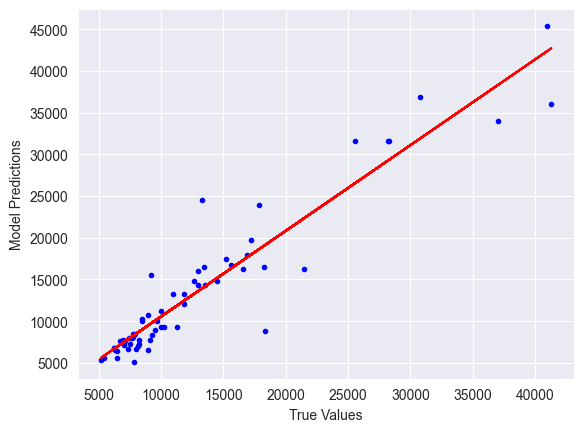

In [119]:
plt.plot(y_test, y_pred_test_best, '.', color='blue')
z = np.polyfit(y_test, y_pred_test_best, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_testf), 'r')

plt.ylabel('Model Predictions')
plt.xlabel('True Values')

Der Scatterplot unterstreicht die Ergebnisse der vorherigen Analysen. Er zeigt, dass die Vorhersagen des Modells für niedrigere Werte der Zielvariablen recht genau sind, da die Punkte nahe der idealen Linie liegen. 

## Aufgabe 6
Compare the results to the chosen machine learning models from task 4 and 5. Which machine
learning model would you select?

Vergleicht man die Analyseergebnisse der trainierten Modelle, ist das Regressionsbaum-Modell den anderen Modellen klar vorzuziehen. Das Modell zeigt eine bessere Balance zwischen Trainings- und Testleistung im Vergleich zu den anderen Modellen, was auf eine bessere Generalisierungsfähigkeit hinweist. Insbesondere weist es im Vergleich zu den vorherigen Modellen, die entweder auf den Trainingsdaten overfitted oder auf den Testdaten unterlegen waren, eine konsistentere Leistung in der Cross-Validation auf. 

## Aufgabe 7
Apply an ensemble learning technique (lecture 05) that provides explainable results. Analyze if
this technique leads to a better performance than in the previous models that you have selected
in task 6.

Ich habe mich für Bagging and Pasting entschieden. Bagging und Pasting verbessern die Modellleistung, indem sie Vorhersagen von mehreren Modellen, die auf unterschiedlichen Stichproben des Trainingsdatensatzes trainiert wurden, kombinieren. Bei Klassifikation wird oft die Mehrheitsentscheidung der Modelle genutzt, bei Regression der Durchschnitt ihrer Vorhersagen. Diese Techniken verringern die Varianz der Einzelmodelle und erhöhen die Genauigkeit und Stabilität des Gesamtmodells.

In [121]:
# Initialisieren des Basis-Modells
tree_reg = DecisionTreeRegressor(random_state=42)

# Initialisieren des Bagging-Modells
bag_reg = BaggingRegressor(base_estimator=tree_reg, n_estimators=100, bootstrap=True, random_state=42)

# Training des Bagging-Modells und Predicten auf Testdaten
bag_reg.fit(x_train, y_train)
y_pred_bagging = bag_reg.predict(x_test)

# Bewertung der Modellleistung
mse_bagging = mean_squared_error(y_test, y_pred_bagging)
r2_bagging = r2_score(y_test, y_pred_bagging)

print(f"Bagging-Test-MSE: {mse_bagging}, Bagging-Test-R²: {r2_bagging}")

Bagging-Test-MSE: 3823798.9777315967, Bagging-Test-R²: 0.9448100848362202


### Hyperparameter-Tuning

In [123]:
grid_search = GridSearchCV(bag_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Festlegen der Parameters
param_grid = {
    'base_estimator__max_depth': [None, 10, 20, 30],
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 1.0],
    'bootstrap': [True, False]  # True für Bagging, False für Pasting
}

# Durchführen des Hyperparameter-Tunings
grid_search.fit(x_train, y_train)

# Ausgabe der besten Parameter
print("Beste Hyperparameter: ", grid_search.best_params_)

# Vorhersagen und Bewertung der Leistung des besten Modells
y_pred_test_best = grid_search.best_estimator_.predict(x_test)
mse_test_best = mean_squared_error(y_test, y_pred_test_best)
r2_test_best = r2_score(y_test, y_pred_test_best)

print(f"Optimierter Test-MSE: {mse_test_best}, Optimierter Test-R²: {r2_test_best}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Beste Hyperparameter:  {'base_estimator__max_depth': None, 'bootstrap': True, 'max_samples': 1.0, 'n_estimators': 100}
Optimierter Test-MSE: 3823798.9777315967, Optimierter Test-R²: 0.9448100848362202


### Cross-Validation

In [124]:
# Durchführung der Cross Validation mit dem Ergebnis des Hyperparameter-Tunings
cv_scores = cross_val_score(grid_search.best_estimator_, x_train, y_train, cv=10, scoring='neg_mean_squared_error')
mse_scores_cv = -cv_scores

# Durchschnittswerte und Standardabweichung der MSE-Werte
print("Durchschnittlicher MSE über die Kreuzvalidierung: ", np.mean(mse_scores_cv))
print("Standardabweichung des MSE über die Kreuzvalidierung: ", np.std(mse_scores_cv))

# Berechnung der durchschnittlichen R²-Werte über die Kreuzvalidierung
r2_scores_cv = cross_val_score(grid_search.best_estimator_, x_train, y_train, cv=10, scoring='r2')
print("Durchschnittlicher R² über die Kreuzvalidierung: ", np.mean(r2_scores_cv))


Durchschnittlicher MSE über die Kreuzvalidierung:  6068228.92649962
Standardabweichung des MSE über die Kreuzvalidierung:  4748676.567368451
Durchschnittlicher R² über die Kreuzvalidierung:  0.8628822556034452


### Scatterplot

Text(0.5, 0, 'True Values')

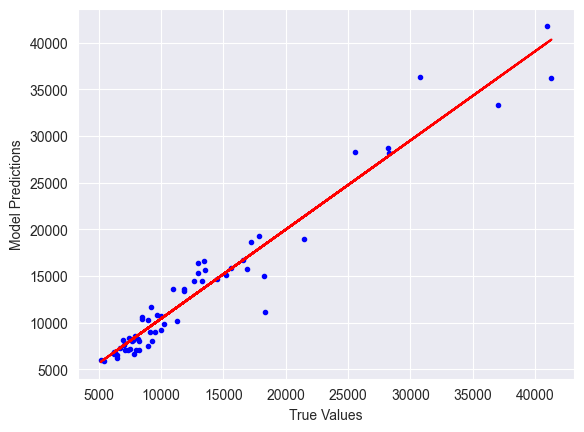

In [126]:
plt.plot(y_test, grid_search.best_estimator_.predict(x_test), '.', color='blue')
z = np.polyfit(y_test, y_pred_test_best, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), 'r')

plt.ylabel('Model Predictions')
plt.xlabel('True Values')

### Fazit
Die Ergebnisse zeigen, dass das Modell auf den Testdaten eine hohe Leistung erzielt, mit einem MSE von etwa 3.823.799 und einem R² von 0.9448, was auf eine starke Übereinstimmung der Vorhersagen mit den tatsächlichen Werten hindeutet. Der durchschnittliche MSE von etwa 6.068.229 und der R² von 0.8629 über die Kreuzvalidierung sind etwas schlechter, was auf eine leichte Abnahme der Modellleistung bei der Anwendung auf verschiedene Daten hinweist. Die relativ hohe Standardabweichung des MSE in der Kreuzvalidierung deutet auf eine gewisse Variabilität in der Modellleistung über verschiedene Datensätze hin. Somit legen diese Ergebnisse nahe, dass das Modell gut generalisiert und nicht überangepasst (overfitted) ist, da es konsistent hohe Leistung sowohl auf den Testdaten als auch über die Kreuzvalidierung zeigt.